# Exploratory Data Analysis (EDA). Retail Industry
## Segment with Highest Total Sales


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Loading the dataset

In [2]:
# Loads the dataset
dataframe_retail = pd.read_csv('data/dataset.csv')

### Exploratory Analysis

In [3]:
# Checking for duplicated data
dataframe_retail[dataframe_retail.duplicated()]

,OrderId,OrderDate,CustomerId,Segment,Country,City,State,ProductId,Category,SubCategory,TotalOrderValue


In [4]:
# Checking for missing values
dataframe_retail.isnull().sum()

OrderId            0
OrderDate          0
CustomerId         0
Segment            0
Country            0
City               0
State              0
ProductId          0
Category           0
SubCategory        0
TotalOrderValue    0
dtype: int64

### Determine which segment had the highest total sales and visualize the results using a pie chart



In [11]:
# Get the top 10 cities
dataframe_retail_total_per_segment = dataframe_retail.groupby('Segment')['TotalOrderValue'].sum().reset_index().sort_values(by = 'TotalOrderValue', ascending = False)


In [12]:
dataframe_retail_total_per_segment.head()

,Segment,TotalOrderValue
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [13]:
# Convert data into absolute value.
def convert_into_absolute(values):
    def absolute_format(pct):
        total = sum(values)
        val = int(round(pct * total /100.0))
        return ' $ {v:d}'.format(v = val)
    return absolute_format

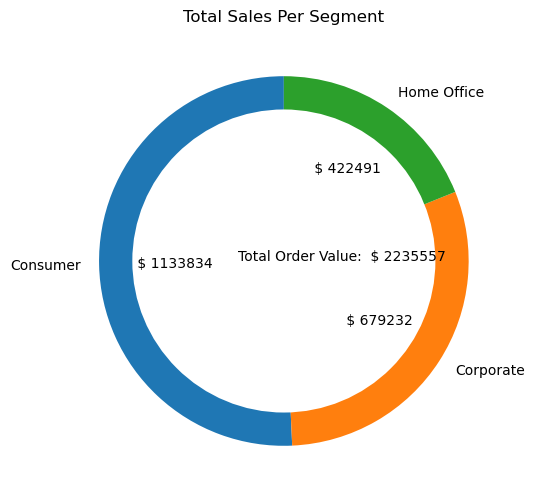

In [14]:
# Create plot.

# Image Size
plt.figure(figsize = (16,6))

# Pie graph
plt.pie(
    dataframe_retail_total_per_segment['TotalOrderValue'],
    labels = dataframe_retail_total_per_segment['Segment'],
    autopct = convert_into_absolute(dataframe_retail_total_per_segment['TotalOrderValue']),
    startangle = 90)

# Clear center circle
center_circle = plt.Circle((0,0), 0.82, fc = 'white')
figure = plt.gcf()
figure.gca().add_artist(center_circle)

# Labels and annotations
plt.annotate(text = 'Total Order Value:  $ ' + str(int(sum(dataframe_retail_total_per_segment['TotalOrderValue']))), xy = (-0.25, 0))
plt.title('Total Sales Per Segment')
plt.show()        